Text(0.05, 0.8, '$\\alpha_i(\\sigma_i) = \\alpha_i(-\\sigma_i) =$0.1 0.7\nNumber MMC samples=1000\nNumber Dynamic step=1000\nLength_chain=3\nJ=1.0\nh=0.0\nT=10.0')

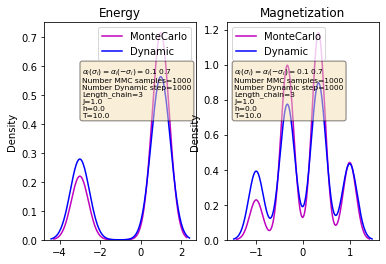

In [2]:
import sys
sys.path.append("D:/Sabrina\Torino\Politecnico\TESI\MC_Alg1\ising\code")
import main
from main import *

random_seed = 1
np.random.seed(random_seed)
chain_size = 3
time_step = 1500
J = 1
h = 0
T = 10
n_samples = 1000
n_steps = 1000
t_burn_in = 10 #int(input("Enter t_burn_in:"))
t_correlation = 1 #int(input("Enter t_correlation:"))

H_MMC, M_MMC = main.metropolis_ising(chain_size, J, h, 1/T, t_burn_in, t_correlation, n_samples)

            ###ALGORITHM 1###
# we define action rate plus and minus because the action rates could depend on the fact that the spin is +/-1
action_rates_plus = []
action_rates_minus = []
action_rate_values = [0.1, 0.7]
separator = " "
string_action_rate = separator.join([str(_) for _ in action_rate_values])
for i in range(chain_size):
    for j in range(len(action_rate_values)):
        action_rates_plus.append(action_rate_values[j])
        action_rates_minus.append(action_rate_values[j])

initial_config = 2 * np.random.randint(2, size=chain_size) - 1
H, M = main.dynamic_evaluation(chain_size=chain_size, T=T, J=J, h=h, n_steps=n_steps, config=initial_config,
                          action_rates_plus=action_rates_plus, action_rates_minus=action_rates_minus)

MMC = {'H_MMC': H_MMC, 'M_MMC': M_MMC}
df_MMC = pd.DataFrame(data=MMC)
dynamic = {'H': H, 'M': M}
df_dynamic = pd.DataFrame(data=dynamic)

fig_kde, axes = plt.subplots(1, 2)
h1 = sns.kdeplot(data=df_MMC["H_MMC"], bw_method='scott', color='m', ax=axes[0])
h1.set(xlabel=None)
h2 = sns.kdeplot(data=df_dynamic["H"], bw_method='scott', color='b', ax=axes[0])
h2.set(xlabel=None)
m1 = sns.kdeplot(data=df_MMC["M_MMC"], bw_method='scott', color='m', ax=axes[1])
m1.set(xlabel=None)
m2 = sns.kdeplot(data=df_dynamic["M"], bw_method='scott', color='b', ax=axes[1])
m2.set(xlabel=None)

textstr = '\n'.join((
    r'$\alpha_i(\sigma_i) = \alpha_i(-\sigma_i) =$' + string_action_rate,
    r'Number MMC samples=%.0f' % (n_samples,),
    r'Number Dynamic step=%.0f' % (n_steps,),
    r'Length_chain=%.0f' % (chain_size,),
    r'J=%.1f' % (J,),
    r'h=%.1f' % (h,),
    r'T=%.1f' % (T,),))

axes[0].set_title("Energy")
axes[0].legend(['MonteCarlo', 'Dynamic'], loc="upper right")
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axes[0].text(0.25, 0.8, textstr, transform=axes[0].transAxes, fontsize=7.5,
             verticalalignment='top', bbox=props)
axes[1].set_title("Magnetization")
axes[1].legend(['MonteCarlo', 'Dynamic'], loc="upper left")
axes[1].text(0.05, 0.8, textstr, transform=axes[1].transAxes, fontsize=7.5,
             verticalalignment='top', bbox=props)


TypeError: set_ticks() takes 2 positional arguments but 3 were given

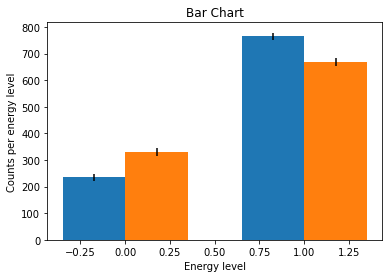

In [4]:
counts_HMMC = main.count_variables(df_MMC["H_MMC"], energy_flag=1)
counts_H = main.count_variables(df_dynamic["H"], energy_flag=1)
binom_avg_MMC, binom_std_MMC = main.testing(df_MMC["H_MMC"], T, n_samples, counts_HMMC)
binom_avg, binom_std = main.testing(df_dynamic["H"], T, n_samples, counts_H)

fig, ax = plt.subplots()
labels = counts_HMMC.keys()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width / 2, counts_HMMC.values(), width, yerr=binom_std_MMC, align='center',
                label='MonteCarlo')
rects2 = ax.bar(x + width / 2, counts_H.values(), width, yerr=binom_std, align='center', label='Dynamic')
ax.set_title('Bar Chart')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()
